In [ ]:
import pathlib
import PIL
import tensorflow as tf

In [ ]:
data_train=pathlib.Path('/content/drive/MyDrive/Camerin DSML/Pizza/Train')
data_test=pathlib.Path('/content/drive/MyDrive/Camerin DSML/Pizza/Test')

In [ ]:
train_image_count=len(list(data_train.glob('*/*')))
print(train_image_count)

966


In [ ]:
test_image_count=len(list(data_test.glob('*/*')))
print(test_image_count)

1000


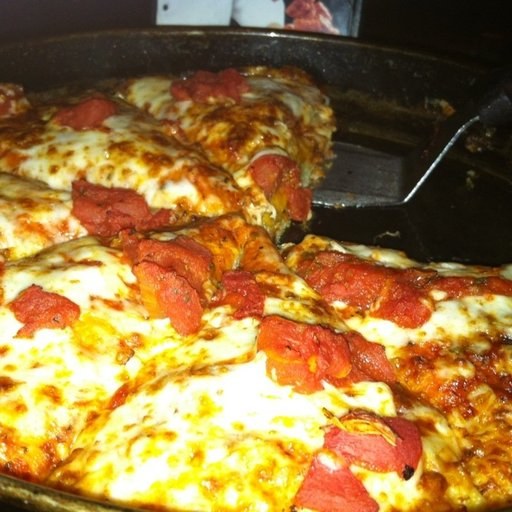

In [ ]:
Pizza=list(data_train.glob('Pizza/*'))
PIL.Image.open(str(Pizza[5]))

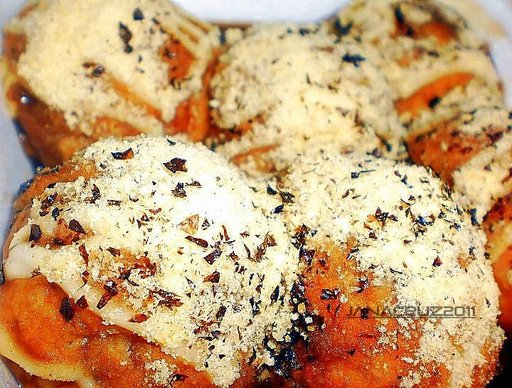

In [ ]:
Not_pizza=list(data_train.glob('Not Pizza/*'))
PIL.Image.open(str(Not_pizza[5]))

In [ ]:
print(len(Pizza))
print(len(Not_pizza))

483
483


In [ ]:
batch_size=32
img_height=200
img_width=200

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(data_train,
                                                     image_size=(img_height,img_width),
                                                     batch_size=batch_size)

Found 966 files belonging to 2 classes.


In [ ]:
test_ds=tf.keras.utils.image_dataset_from_directory(data_test,
                                                    image_size=(img_height,img_width),
                                                    batch_size=batch_size)

Found 1000 files belonging to 2 classes.


In [ ]:
classes=train_ds.class_names
print(classes)

['Not Pizza', 'Pizza']


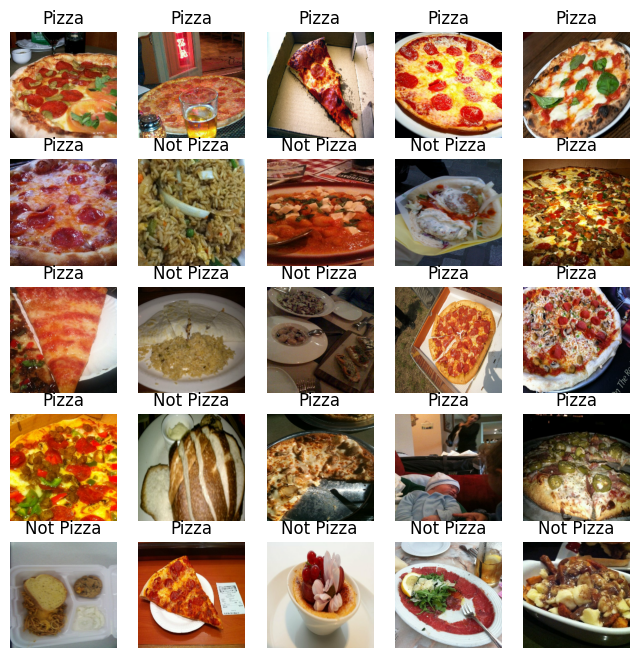

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
rows=5
columns=5

for images,labels in train_ds.take(1):
  for i in range(1,rows*columns+1):
    fig.add_subplot(rows,columns,i)
    plt.axis('off')
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(classes[labels[i]])
plt.show()

In [ ]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal',
                          input_shape=(img_height,img_width,3)),
                          layers.RandomCrop(img_height,img_width),
                          layers.RandomContrast(0.15),
                          layers.RandomRotation(0.1),
                          layers.RandomZoom(0.2)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


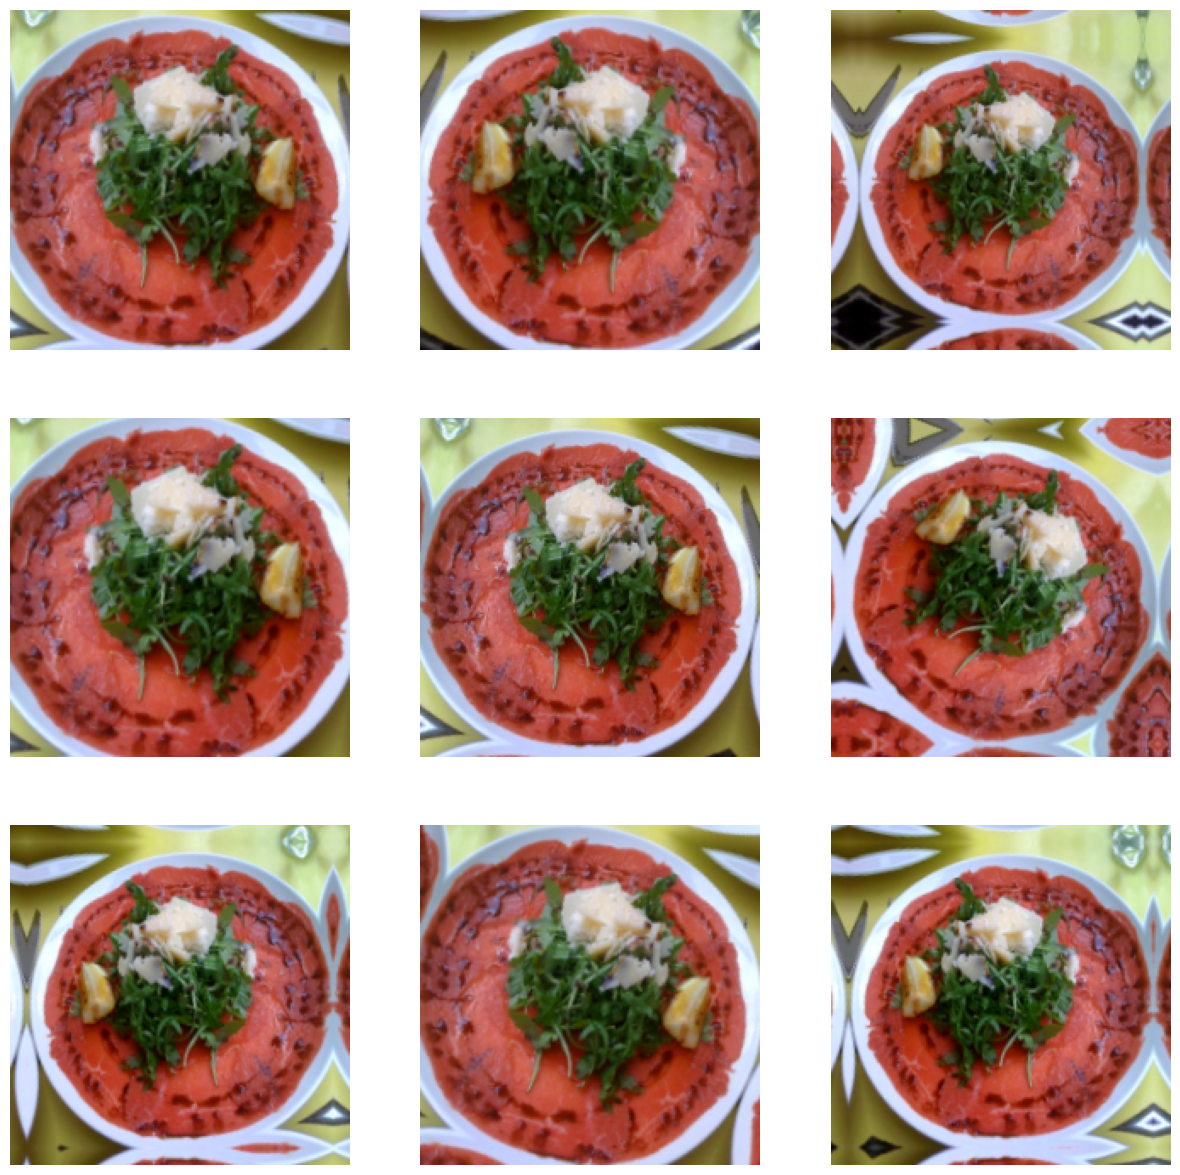

In [ ]:
plt.figure(figsize=(15,15))
for images,_ in train_ds.take(3):
  for i in range(9):
    augmented_images=data_augmentation(images)
    ax=plt.subplot(3,3,i+1) #3 images
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential([data_augmentation,layers.Rescaling(1./255)])

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       640,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 697,761 (2.66 MB)

 Trainable params: 697,505 (2.66 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
# c=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
epoch=25

In [ ]:
f=model.fit(train_ds,epochs=epoch,batch_size=32,validation_data=(test_ds))

Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8618 - loss: 0.3893 - val_accuracy: 0.7740 - val_loss: 0.5258
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.8652 - loss: 0.3850 - val_accuracy: 0.8020 - val_loss: 0.4675
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.8612 - loss: 0.3855 - val_accuracy: 0.8090 - val_loss: 0.4842
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8680 - loss: 0.3607 - val_accuracy: 0.7990 - val_loss: 0.4664
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.8570 - loss: 0.3792 - val_accuracy: 0.8060 - val_loss: 0.4892
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8517 - loss: 0.3983 - val_accuracy: 0.7940 - val_loss: 0.4727
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.8505 - loss: 0.3837 - val_accuracy: 0.8160 - val_loss: 0.4541
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.8693 - loss: 0.3554 - val_accuracy: 0.

In [ ]:
final=f.history
final.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
final['val_accuracy'][-1]

0.7850000262260437

In [ ]:
final['accuracy'][-1]

0.8768116235733032

In [ ]:
final['val_loss'][-1]

0.5543690323829651

In [ ]:
final['loss'][-1]

0.3333256244659424

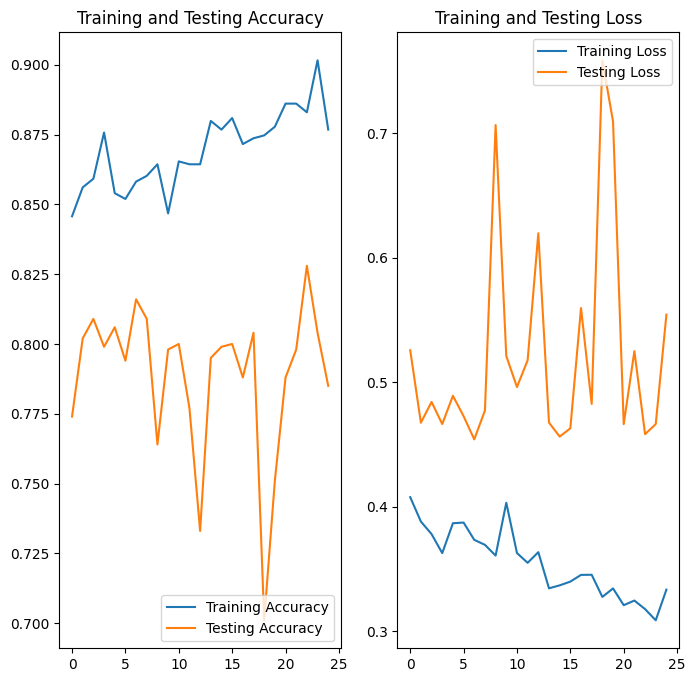

In [ ]:
acc=final['accuracy']
test_acc=final['val_accuracy']

loss=final['loss']
test_loss=final['val_loss']

epochs_range=range(epoch)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,test_acc,label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,test_loss,label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


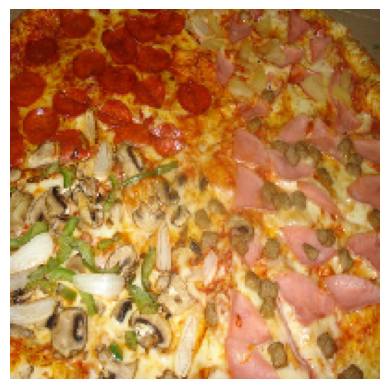

Pizza


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
  img=image.load_img(img_path,target_size=(img_height,img_width))
  img_array=image.img_to_array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)
  prediction=model.predict(img_array)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  if prediction[0] > 0.5:
    print('Not Pizza')
  else:
    print('Pizza')



predict_image('/content/drive/MyDrive/Camerin DSML/Pizza/Test/Pizza/1635386.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


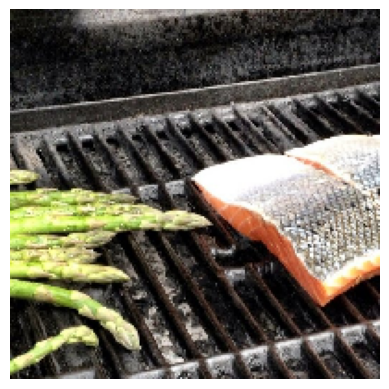

Pizza


In [ ]:
predict_image('/content/drive/MyDrive/Camerin DSML/Pizza/Test/Not Pizza/1724171.jpg')